In [1]:
from os import listdir
from os.path import isfile, join
from nltk.tokenize import TweetTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cal_f1_score(path_pre, eps = 0.0001):

    ref_path = path_pre + '/reference/'
    reference_files = [f for f in listdir(ref_path) if isfile(join(ref_path, f))]
    dec_path = path_pre + '/decoded/'
    decoded_files = [f for f in listdir(dec_path) if isfile(join(dec_path, f))]

    reference_files.sort()
    decoded_files.sort()

    num_file = len(reference_files)
    precisions = np.zeros(num_file)
    recalls = np.zeros(num_file)

    tokenizer = TweetTokenizer()
    for i in range(num_file):
    #     if reference_files[i][:6] ==  decoded_files[i][:6]:
    #         print reference_files[i], decoded_files[i]
        f_ref = open(ref_path + reference_files[i], 'r').read()
        f_ref_token = set(tokenizer.tokenize(f_ref))
    #     print(reference_files[i] ,f_red.read())
        f_decode = open( dec_path + decoded_files[i], 'r').read()
        f_decode_token = set(tokenizer.tokenize(f_decode))
        precisions[i] = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_decode_token) + eps)
        recalls[i] = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_ref_token)+ eps)
        
    pre = np.mean(precisions)
    rec = np.mean(recalls)
    f1 = 2.0 / (1.0/pre + 1.0/rec)
    print('total ', i, ' number of samples')
    return [pre, rec, f1 ]
#         print reference_files[i]
#         print "ref:", f_ref
#         print decoded_files[i]
#         print "decode:", f_decode
#     print( decoded_files[i] , f_decode.read())
# f = open('example.txt', 'r')


In [4]:
# pretrained model
path_pre = './log/pretrained_model/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410'

cal_f1_score(path_pre) # return: precision, recall, f1

('total ', 4458, ' number of samples')


[0.14248918894115392, 0.38500032992872757, 0.20799800864727042]

In [5]:
# our training
path_pre = './log/reddit_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-39995_cov_init_cov_init'

cal_f1_score(path_pre)

('total ', 4458, ' number of samples')


[0.22693112952839692, 0.280542278653292, 0.2509048756007665]

In [6]:
# lead-3 baseline
path_pre = '../AskReddit_baseline_summarization'

cal_f1_score(path_pre)

('total ', 446413, ' number of samples')


[0.13421487565445456, 0.34257666185145413, 0.1928678697320262]

In [34]:
np.max(recalls)

1.0

In [35]:
np.mean(recalls)

0.38630394815427593

In [36]:
np.mean(precisions)

0.13801663019276983

In [7]:
i

517

In [28]:
i = 735
f_ref = open(ref_path + reference_files[i], 'r').read()
f_ref_token = set(tokenizer.tokenize(f_ref))
#     print(reference_files[i] ,f_red.read())
f_decode = open( dec_path + decoded_files[i], 'r').read()
f_decode_token = set(tokenizer.tokenize(f_decode))
# precisions[i] = len(f_decode_token.intersection(f_ref_token)) / len(f_decode_token)
# recalls[i] = len(f_decode_token.intersection(f_ref_token)) / len(f_ref_token)
print reference_files[i]
print "ref:", f_ref
print decoded_files[i]
print "decode:", f_decode

000735_reference.txt
ref: nothing .
000735_decoded.txt
decode: something ? seriously , i am now currently doing nothing it is because more then .
am not on the internet but in the end it would be more effort for the same result .
if i am said person asking said question in which whatever i was doing something that does not matter to you so by default in too becomes nothing .


In [31]:
f_decode_token.intersection(f_ref_token)

{u'.', u'nothing'}

## relationships small dataset

In [3]:
def add_example(eg_list, f_content, f_ref, f_decode, precision, recall):
    return eg_list + [{'content':f_content, 'reference': f_ref, 'decode': f_decode, 
                      'precision': precision, 'recall': recall}]

In [4]:
def print_and_cal(path_pre, max_output = 0, eps = 0.0001):
    cont_path = path_pre + '/content/'
    content_files = [f for f in listdir(cont_path) if isfile(join(cont_path, f))]
    ref_path = path_pre + '/reference/'
    reference_files = [f for f in listdir(ref_path) if isfile(join(ref_path, f))]
    dec_path = path_pre + '/decoded/'
    decoded_files = [f for f in listdir(dec_path) if isfile(join(dec_path, f))]

    content_files.sort()
    reference_files.sort()
    decoded_files.sort()
    
    if max_output:
        num_file = np.min([len(content_files), max_output])
    else:
        num_file = len(content_files)

    precisions = np.zeros(num_file)
    recalls = np.zeros(num_file)

    low_prec_low_recall = []
    low_prec_high_recall = []
    high_prec_low_recall = []
    high_prec_high_recall = []

    low_shreshold = 0.2
    high_shreshold = 0.5

    tokenizer = TweetTokenizer()
    for i in range(num_file):
    #     if reference_files[i][:6] ==  decoded_files[i][:6]:
    #         print reference_files[i], decoded_files[i]
        f_ref = open(ref_path + reference_files[i], 'r').read()
        f_content = open(cont_path + content_files[i], 'r').read()
        f_decode = open( dec_path + decoded_files[i], 'r').read()

        f_ref_token = set(tokenizer.tokenize(f_ref))
        f_content_token = set(tokenizer.tokenize(f_ref))
    #     print(reference_files[i] ,f_red.read())
        f_decode_token = set(tokenizer.tokenize(f_decode))
        precision = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_decode_token) + eps)
        precisions[i] = precision
        recall = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_ref_token)+ eps)
        recalls[i] = recall
        if precision <= low_shreshold and recall <= low_shreshold:
            low_prec_low_recall = add_example(low_prec_low_recall, f_content, f_ref, f_decode, precision, recall)
        elif  precision <= low_shreshold and recall > high_shreshold:
            low_prec_high_recall = add_example(low_prec_high_recall, f_content, f_ref, f_decode, precision, recall)
        elif precision > high_shreshold and recall <= low_shreshold:
            high_prec_low_recall = add_example(high_prec_low_recall, f_content, f_ref, f_decode, precision, recall)
        elif precision > high_shreshold and recall > high_shreshold:
            high_prec_high_recall = add_example(high_prec_high_recall, f_content, f_ref, f_decode, precision, recall)

        print('content: ', f_content)
        print('reference: ', f_ref)
        print('decoded:', f_decode)
        print('precision:', precisions[i], 'recall:', recalls[i])

    pre = np.mean(precisions)
    rec = np.mean(recalls)
    f1 = 2.0 / (1.0/pre + 1.0/rec)
    print('total ', i, ' number of samples')
    examples = {'low_prec_low_recall': low_prec_low_recall,
               'low_prec_high_recall': low_prec_high_recall,
               'high_prec_low_recall': high_prec_low_recall,
               'high_prec_high_recall': high_prec_high_recall}
    return [pre, rec, f1, examples]

In [5]:
# subreddit_names = ['relationships', 'legaladvice', 'nfl',  'pettyrevenge', 'atheismbot', 
#                             'ShouldIbuythisgame', 'ukpolitics', 'Dogtraining',  'AskHistorians', 'Anxiety']

# sub = 'legaladvice'

# path_pre = './log/fine_tune_' + sub + '_exp/'
# subfolder_name = [d for d in listdir(path_pre) if d[:3] == 'dec'][0]
# path_pre += subfolder_name

path_pre = './log/fine_tune_combine10_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238937_cov_init'

[pre, rec, f1, examples] = print_and_cal(path_pre, max_output = 5000)

content:  i need to vent . i have these two work friends . they always act like they want to hang out but they do n't . they hang out with each other and drink but i 'm never invited . they know i 'm really lonely and have no one in my life that wants to spend time with me . i do n't broadcast it or anything but a long time ago around when we first met my girlfrend broke up with me and i revealed she was the only human who actually wanted to spend time with me and now things just sucked . long after that we all became good work friends and one of them even sent me a message saying how much i brighten their day when they are down . they tease me with acting like they want to hang out but they do n't . one of them did a walk with me for charity which was great but beyond that it 's just words . the comment has been made `` man i bet he would be the funnest person ever with some alcohol in him '' `` because he has no tolerance even one jello shot would do it '' `` yeah , imagine him like 

reference:  elsa is probably guilty of negligent homicide . hans is guilty of murder .
decoded: daughter died from her condition and arendelle has passed the model penal code : if elsa is culpable of anything it might be negligent homicide .
i do n't think her heart to be frozen .
precision: 0.18181763085566405 recall: 0.5999940000599994
content:  in november 2015 , i got into a car accident . i was heading down a major road and a woman turned left in front of me . i hit her rear end , and she ran into another person that was on the side street that she was trying to turn onto . as soon as ms. toyota got out of the car , the exact words that came out of her mouth were `` i was on the phone with my husband , let me call him back . '' she did n't even ask how i was . cops were called , and we waited . the entire time we waited , myself and ms. subaru avoided ms. toyota because everything that came out of her mouth was an accusation that i was at fault . an hour later , fire and rescue sh

reference:  they have completely different skill sets and need to be used in the appropriate manner .
decoded: gio has a lot of 0 and 15 yard chunks .
i do n't have to withstand the punishment of 20 25 touches a game .
i do n't have to withstand the punishment of 20 touches a game .
precision: 0.21739035917235142 recall: 0.31249804688720695
content:  nah , just range is farther . you have less air pressure but that wo n't negate the acceleration due to gravity much . of course acceleration due to gravity is slightly weaker at higher elevation , but there 's less dense air underneath it . so it 's not a big deal . the reason it can go further is because the air resistance in the x direction is weaker in this case since their is less air . it does n't matter as much in the y direction . therefore the hang time is the same , but the distance will be greater . i 'm on mobile in church right now , sorry if i ended up typing something stupid in the middle of that , i can edit when i get home

content:  author : onlyonemore | author karma : 1 / 1 | self submission | was being picked on by a group of 4 christians . this has opened my eyes to how pushy christians can be . athiests just do their thing while they intend to `` save us . '' well the only thing i want to be saved from is them pushing thier god crap down my throat .
reference:  even young christians in high school try to convert .
decoded: pushy christians can be pushing thier god crap down my throat .
well the only thing i want to be saved from is them pushing thier god crap down my throat .
well the only thing i want to be .
precision: 0.13043421550341086 recall: 0.2999970000299997
content:  author : agcross | author karma : 78 / 18 | -lrb- describe why you are flagging this submission - i really do see hope for the future because of kids like this : my chess student is 7 years old and we were in the airport on our way back from a national chess tournament when i told the security guard `` he is a genius . '' he t

reference:  start at i. play through ii and brotherhood . stop .
decoded: the first game is n't as bad as everyone says .
the first game is the best place to start where things are relatively simple and the mechanics are what you need to keep going .
precision: 0.11538417159934 recall: 0.2999970000299997
content:  hi guys , i am looking for new games i have n't played yet or did n't know about it at all . i appreciate every suggestion from everyone :-rrb- ! english is not my native language , read on your own risk ! first of all i am a person who does n't like games if their graphic does n't look appealing to me , but exceptions are always there ! :-rrb- and second i really want / need atleast a co-op mode to play with friends or / and online . games i play / have played : league of legends world of warcraft dota 2 counter strike global offensive far cry 3 need for speed most wanted rust borderlands 2 diablo 3 + ros starcraft 2 battlefield 4 titanfall hearthstone burnout paradise proto

precision: 0.31818037190740045 recall: 0.09999985714306121
content:  a former labour speechwriter admitted that labour opened the floodgates of immigration to `` change the face of the nation '' to `` rub the right 's nose in diversity '' now i 'm a racist , or so i 've been told , i believe every race on earth , ashkenazi , germanic , bedouin , latin , slavic , every race , should have a homeland . it 's not that i consider any race superior or inferior , i think we 're all humans that are equal , but i think every race should be allowed to live . and it is a fact that the white race wo n't be a majority in a century if nothing changes , we 're importing 250,000 immigrants a year that have a higher birth rate than indiginous white people , you do n't have to be a mathematician to work this out , we will be a minority if we carry on the way we are . the problem is this is n't the immigrants fault , by even the slightest means , this is the fault of the labour party , and to a lesser ex

content:  i have a sweet deaf 1.5 year old pitbull nova . i 've had her since she was 8 weeks old and she has been nothing but a cuddle bug until i moved into my moms house and she started to spend time around my parents poorly trained mutt toby . toby is not good with other dogs and shows lots of aggression . i tried my best to keep nova away from him but as i lived with my mom longer she began to let nova spend time with toby when i was working or away . nova would try to play with toby but he would snap and growl at her . nova would pancake or back away when he did this . toby has food and toy aggression . nova had neither of these traits . as time passed nova took notice of this agression . currently toby and nova can not be in the same room if there is food present because nova will try to bite toby or vice versa . for the first time ever nova recently bit a family friend while she was chewing a rawhide bone . my mother was watching her so i do n't know the exact situation but it 

content:  the concept is not anachronistic , but it was fantasy language to fit the fantasy world . fantasy authors often times , and rightfully so to give an authenticity to their own world , take an identical concept that actually exists , then give a regional/local term for it . when a lord in song of ice and fire `` raises his banners '' , he 's simply acting upon his feudal rights as lord to call upon his vassals . such a concept was the driving line behind the feudal era . typically speaking , do n't expect any term in a fantasy novel to stand the test of historical scrutiny , but the concept behind `` raising the banners '' is one whose roots are in historical feudalism . as a quick check remember it essentially worked as a series of top down allegiances . the king was , in many regards , the chief noble , the noble that all the other nobles adhered to . his own personal army was not tens of thousands strong , the meat of his army was dependent upon his lords , who were in essen

In [6]:
for key, value in examples.items():
    print(key, len(value))
examples

('low_prec_high_recall', 0)
('low_prec_low_recall', 16)
('high_prec_high_recall', 0)
('high_prec_low_recall', 20)


{'high_prec_high_recall': [],
 'high_prec_low_recall': [{'content': "i met a girl over tinder last month . we are both recent college grads living at home with our parents . we 've gone on normal dates , mostly just getting drinks and then taking a walk and making out every 1-2 weeks . last night was our 5th date and we had sex . i do not know what she wants . and she does not know what i want . we have n't communicated about it . i merely want to date casually and not exclusively for now and definitely not a relationship . it has nothing to do with her , just with where i 'm at in life . the thing i 'm nervous about is if she wants something more and i do not . there are signs that she has romantic feelings for me . i feel bad for having sex with her when we have n't communicated what we wanted yet . i do n't want to hurt her . i 'm fine with what we 're doing so far very casually . i like to be with her , but i do n't want anything serious . i am very new to casual dating and dating 

In [38]:
[pre, rec, f1 ]

[0.31974029778215757, 0.40476269263471176, 0.35726269066098604]

(array([ 3., 15., 15., 18., 10.,  4.,  2.,  2.,  4.,  6.]),
 array([0.        , 0.0806449 , 0.1612898 , 0.2419347 , 0.3225796 ,
        0.40322451, 0.48386941, 0.56451431, 0.64515921, 0.72580411,
        0.80644901]),
 <a list of 10 Patch objects>)

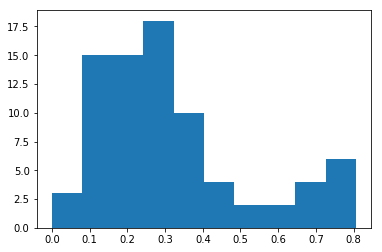

In [15]:
plt.hist(precisions)

(array([ 1.,  6., 25., 19.,  8.,  5.,  5.,  1.,  3.,  6.]),
 array([0.        , 0.09999923, 0.19999846, 0.29999769, 0.39999692,
        0.49999615, 0.59999538, 0.69999462, 0.79999385, 0.89999308,
        0.99999231]),
 <a list of 10 Patch objects>)

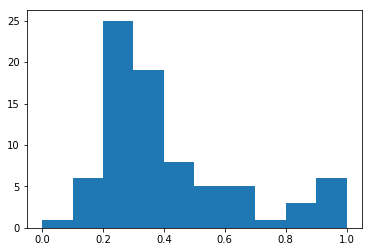

In [16]:
plt.hist(recalls)